<a href="https://colab.research.google.com/github/armandossrecife/my_validation2/blob/main/analise_commits_issues_cassandra_c1_c2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compara os cenários de issues no Cassandra

**Cenário1:** Issues que aparecem nos Commits com Arquivos Críticos

**Cenário2:** Issues que aparecem nos Commits com Arquivos Críticos e SATD (msg e diffs)

Dados baseado nas amostras colhidas para os cada um dos cenários.

# Importa dataset

In [77]:
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/cenario1_issues_inspected.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/cenario1_commits_crical_classes_and_issues.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/cenario2_issues_inspected.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation2/main/cenario2_commits_crical_classes_and_issues.xlsx

--2023-10-30 15:17:45--  https://raw.githubusercontent.com/armandossrecife/my_validation2/main/cenario1_issues_inspected.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 484320 (473K) [application/octet-stream]
Saving to: ‘cenario1_issues_inspected.xlsx’

cenario1_issues_ins 100%[===================>] 472.97K  --.-KB/s    in 0.008s  

2023-10-30 15:17:45 (60.2 MB/s) - ‘cenario1_issues_inspected.xlsx’ saved [484320/484320]

--2023-10-30 15:17:46--  https://raw.githubusercontent.com/armandossrecife/my_validation2/main/cenario1_commits_crical_classes_and_issues.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.

# Scripts de Apoio

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

df_issues_cenario1 = pd.read_excel('cenario1_issues_inspected.xlsx')
df_commits_cenario1 = pd.read_excel('cenario1_commits_crical_classes_and_issues.xlsx')
df_issues_cenario2 = pd.read_excel('cenario2_issues_inspected.xlsx')
df_commits_cenario2 = pd.read_excel('cenario2_commits_crical_classes_and_issues.xlsx')

def show_pie(my_df, my_field, my_title):
  type_counts = my_df[my_field].value_counts().sort_values(ascending=False)
  type_percentages = type_counts / type_counts.sum() * 100

  plt.pie(type_percentages, labels=type_counts.index, autopct="%.1f%%")
  plt.title(my_title)
  plt.show()
  print(f'Total: {type_counts[0] + type_counts[1]} - Yes: {type_counts[1]}, No: {type_counts[0]}')

# Cenário 1 - Issues que aparecem nos Commits com Arquivos Críticos

Amostra de 226 issues inspecionados

## Issues inspecionados

In [79]:
df_issues_cenario1

,issue_key,summary,issue_type,issue_status,issue_priority,description,comments,architectural_impact
0,CASSANDRA-235,Move system CFs into own Table,Sub-task,Resolved,Normal,NaN,"[""commit message for 04 reads\n\n DBManager...",YES
1,CASSANDRA-212,Range queries do not yet span multiple nodes,Bug,Resolved,Normal,Need ability to continue a query on the next n...,"[""All this needs is a bool added to RangeReply...",YES
2,CASSANDRA-173,add getPendingTasks to CFSMBean,Improvement,Resolved,Low,need to add an atomicint and inc/decr it whene...,['rebased patch as 0001-CASSANDRA-173-added-CF...,NO
3,CASSANDRA-124,NullPointerException in consistency manager af...,Bug,Resolved,Urgent,ERROR [CONSISTENCY-MANAGER:2] 2009-04-30 18:22...,"[""Shouldn't ConsistencyManager() constructor c...",NO
4,CASSANDRA-78,Interrupted recovery requires manual intervent...,Bug,Resolved,Urgent,"Originally reported by Alexander Staubo: ""If y...","[""Prashant's memory seems to be wrong here -- ...",NO
...,...,...,...,...,...,...,...,...
221,CASSANDRA-18153,Memtable being flushed without hostId in versi...,Bug,Resolved,Normal,On ticket CASSANDRA-16619 some files were chan...,"['CC [~jlewandowski]\xa0', 'Storage service is...",YES
222,CASSANDRA-18697,Skip ColumnFamilyStore#topPartitions initializ...,Bug,Resolved,Normal,In {{org.apache.cassandra.db.ColumnFamilyStore...,['CI: [https://app.circleci.com/pipelines/gith...,NO
223,CASSANDRA-18681,Internode legacy SSL storage port certificate ...,Bug,Resolved,Normal,In CASSANDRA-16666 the SSLContext cache was ch...,['4.1 [Branch|https://github.com/jonmeredith/c...,YES
224,CASSANDRA-18617,Disable the deprecated keyspace/table threshol...,Improvement,Resolved,Normal,The non-guardrail thresholds 'keyspace_count_w...,"[""Part of this change is to add converters tha...",YES


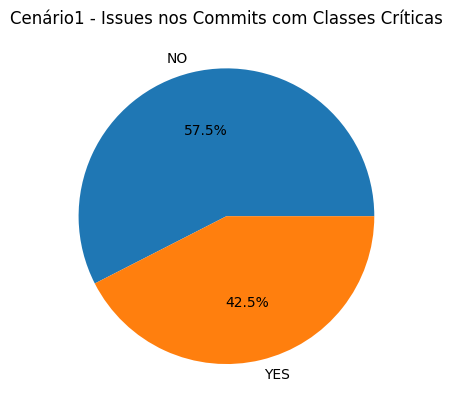

Total: 226 - Yes: 96, No: 130


In [80]:
show_pie(my_df=df_issues_cenario1, my_field='architectural_impact', my_title='Cenário1 - Issues nos Commits com Classes Críticas')

## Commits dos issues inspecionados

In [81]:
df_commits_cenario1

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files,architectural_impact,scenario
0,9db8da81b7f269e5a8a7f896b751d482847d7082,CASSANDRA-71,"Add range query support, which requires using ...","['DatabaseDescriptor.java', 'ColumnFamilyStore...",29/4/2009,1456,19,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -114,6 +114,9 @@ service Cassandra ...",YES,1
1,5cdc75d7603d1051c9d78d6ee11dd9cd44056f44,CASSANDRA-235,move Hints cf to SYSTEM_TABLE\npatch by jbelli...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,189,7,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -25,6 +25,8 @@\n <!-- Tables an...",YES,1
2,682736ee5ebf33ed344abd1c6e04dc408a07bfe6,CASSANDRA-235,r/m recycle cf and undocumented/incomplete Loa...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,2165,18,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -467,12 +467,8 @@ public class Data...",YES,1
3,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,CASSANDRA-235,use normal Table for system metadata\npatch by...,"['DatabaseDescriptor.java', 'StorageService.ja...",24/6/2009,304,8,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -77,7 +77,6 @@\n Keep the ...",YES,1
4,b516ce8176c4ff90f4f1696aba9315941b67f0d0,CASSANDRA-235,DBManager obscures rather than clarifies what ...,"['CassandraDaemon.java', 'StorageService.java']",24/6/2009,158,7,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -107,7 +107,7 @@ public class Callo...",YES,1
...,...,...,...,...,...,...,...,...,...,...,...
253,4c85c6a4030d7d613230cd4b2204c42f941fd552,CASSANDRA-17904,"key_cache_save_period, row_cache_save_period, ...",['Config.java'],19/9/2022,10,3,"[\n {\n ""Config.java"": ""@@ -434,19 +...","[\n ""@@ -1,4 +1,5 @@\n 4.1-alpha2\n+ * We s...",NO,1
254,b8494a82751ae2d31ab0f36412f7eacdcc1c3774,CASSANDRA-18219,Log warning message on aggregation queries wit...,['SelectStatement.java'],7/2/2023,8,2,"[\n {\n ""SelectStatement.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 4.0.8\n+ * Log warni...",NO,1
255,b8e21fb80afa6696374292dc99a480fac9788e64,CASSANDRA-14319,Validate the existence of a datacenter in node...,['StorageService.java'],17/5/2023,68,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -1,4 +1,5 @@\n 3.0.30\n+ * Validate...",NO,1
256,9c796dfb272daa3ce57a2dc5cbeadd9273e1ac72,CASSANDRA-18697,Skip ColumnFamilyStore#topPartitions initializ...,['ColumnFamilyStore.java'],1/8/2023,98,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Skip Colu...",NO,1


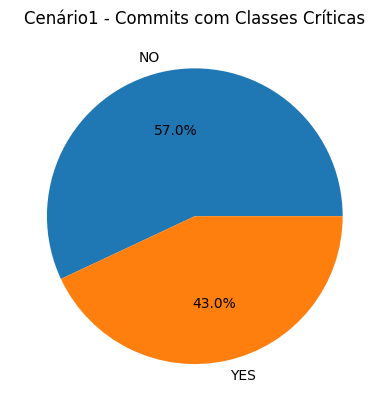

Total: 258 - Yes: 111, No: 147


In [82]:
show_pie(my_df=df_commits_cenario1, my_field='architectural_impact', my_title='Cenário1 - Commits com Classes Críticas')

### Commits com Architectural Impact

Commits com classes críticas e issues registrados

In [83]:
df_commits_com_architectural_impacdt_c1 = df_commits_cenario1[df_commits_cenario1['architectural_impact']=='YES']
df_commits_com_architectural_impacdt_c1

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files,architectural_impact,scenario
0,9db8da81b7f269e5a8a7f896b751d482847d7082,CASSANDRA-71,"Add range query support, which requires using ...","['DatabaseDescriptor.java', 'ColumnFamilyStore...",29/4/2009,1456,19,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -114,6 +114,9 @@ service Cassandra ...",YES,1
1,5cdc75d7603d1051c9d78d6ee11dd9cd44056f44,CASSANDRA-235,move Hints cf to SYSTEM_TABLE\npatch by jbelli...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,189,7,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -25,6 +25,8 @@\n <!-- Tables an...",YES,1
2,682736ee5ebf33ed344abd1c6e04dc408a07bfe6,CASSANDRA-235,r/m recycle cf and undocumented/incomplete Loa...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,2165,18,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -467,12 +467,8 @@ public class Data...",YES,1
3,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,CASSANDRA-235,use normal Table for system metadata\npatch by...,"['DatabaseDescriptor.java', 'StorageService.ja...",24/6/2009,304,8,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -77,7 +77,6 @@\n Keep the ...",YES,1
4,b516ce8176c4ff90f4f1696aba9315941b67f0d0,CASSANDRA-235,DBManager obscures rather than clarifies what ...,"['CassandraDaemon.java', 'StorageService.java']",24/6/2009,158,7,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -107,7 +107,7 @@ public class Callo...",YES,1
...,...,...,...,...,...,...,...,...,...,...,...
106,4f348786bd6d72f4402134a29ddb3355b1fade61,CASSANDRA-18105,Do not remove truncated_at entry in system.loc...,['ColumnFamilyStore.java'],26/4/2023,128,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 3.0.29\n+ * Do not r...",YES,1
107,028ea02a4a877d115c748d3e179c6afb2328e430,CASSANDRA-14204,Remove unrepaired SSTables from garbage collec...,['CompactionManager.java'],4/7/2023,92,3,"[\n {\n ""CompactionManager.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 3.11.16\n+ * Remove ...",YES,1
108,aac070681bd01ba796814692c3fba04de103d8b4,CASSANDRA-18617,Disable the deprecated keyspace/table threshol...,"['Config.java', 'DatabaseDescriptor.java', 'St...",14/7/2023,359,18,"[\n {\n ""Config.java"": ""@@ -826,18 +...","[\n ""@@ -1,4 +1,5 @@\n 5.0\n+ * Disable the...",YES,1
109,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,CASSANDRA-18058,In-memory index implementation with query path...,"['SinglePartitionReadCommand.java', 'StorageSe...",26/7/2023,20645,244,"[\n {\n ""SinglePartitionReadCommand....","[\n ""@@ -135,5 +135,9 @@\n <groupId>d...",YES,1


In [84]:
round(df_commits_com_architectural_impacdt_c1.describe(), 2)

,lines,files,scenario
count,111.00,111.00,111.0
mean,2724.37,15.99,1.0
std,20524.59,34.76,0.0
min,1.00,1.00,1.0
25%,37.50,3.00,1.0
50%,128.00,6.00,1.0
75%,416.50,15.00,1.0
max,215675.00,244.00,1.0


### Commits sem Architectural Issues

Commits com classes críticas e issues registrados

In [85]:
df_commits_sem_architectural_impacdt_c1 = df_commits_cenario1[df_commits_cenario1['architectural_impact']=='NO']
df_commits_sem_architectural_impacdt_c1

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files,architectural_impact,scenario
111,bbe89e795bbc631c2b626766840d943498304630,CASSANDRA-124,do not leave variables uninitialized in Consis...,['StorageService.java'],4/5/2009,22,2,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -145,16 +145,18 @@ class Consistenc...",NO,1
112,f70a5a0c8cff203b17285494fbbd99176bbee649,CASSANDRA-78,clean up anticompaction code a little.\npatch ...,['ColumnFamilyStore.java'],4/5/2009,43,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1027,8 +1027,6 @@ public class Col...",NO,1
113,fce0ee0d7b89576c7f49c2f24a90e8f26e10314a,CASSANDRA-34,This changeset abstracts the logic for placing...,['ColumnFamilyStore.java'],5/5/2009,126,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -402,11 +402,9 @@ public class Colu...",NO,1
114,7779df6ce4633752a0f6768da94627aee2162103,CASSANDRA-34,This patch adds ColumnFamilyStore.forceflush t...,['ColumnFamilyStore.java'],5/5/2009,7,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -425,7 +425,7 @@ public class Colum...",NO,1
115,f17487c541dfae03858ae703015d4049094a0f55,CASSANDRA-34,A make hint generation include a real timestam...,['ColumnFamilyStore.java'],5/5/2009,96,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -641,7 +641,7 @@ public class Colum...",NO,1
...,...,...,...,...,...,...,...,...,...,...,...
253,4c85c6a4030d7d613230cd4b2204c42f941fd552,CASSANDRA-17904,"key_cache_save_period, row_cache_save_period, ...",['Config.java'],19/9/2022,10,3,"[\n {\n ""Config.java"": ""@@ -434,19 +...","[\n ""@@ -1,4 +1,5 @@\n 4.1-alpha2\n+ * We s...",NO,1
254,b8494a82751ae2d31ab0f36412f7eacdcc1c3774,CASSANDRA-18219,Log warning message on aggregation queries wit...,['SelectStatement.java'],7/2/2023,8,2,"[\n {\n ""SelectStatement.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 4.0.8\n+ * Log warni...",NO,1
255,b8e21fb80afa6696374292dc99a480fac9788e64,CASSANDRA-14319,Validate the existence of a datacenter in node...,['StorageService.java'],17/5/2023,68,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -1,4 +1,5 @@\n 3.0.30\n+ * Validate...",NO,1
256,9c796dfb272daa3ce57a2dc5cbeadd9273e1ac72,CASSANDRA-18697,Skip ColumnFamilyStore#topPartitions initializ...,['ColumnFamilyStore.java'],1/8/2023,98,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Skip Colu...",NO,1


In [86]:
round(df_commits_sem_architectural_impacdt_c1.describe(), 2)

,lines,files,scenario
count,147.00,147.00,147.0
mean,233.57,7.78,1.0
std,544.01,12.46,0.0
min,1.00,1.00,1.0
25%,12.00,2.00,1.0
50%,68.00,3.00,1.0
75%,192.00,8.00,1.0
max,3841.00,93.00,1.0


# Cenário 2 - Issues que aparecem nos Commits com Arquivos Críticos e SATD (msg e/ou diff)

Amostra de 195 issues

## Issues inspecionados

In [87]:
df_issues_cenario2

,issue_key,issue_type,summary,description,status,priority,comments,architectural_impact
0,CASSANDRA-235,Sub-task,Move system CFs into own Table,NaN,Resolved,Normal,commit message for 04 reads\n\n DBManager o...,NO
1,CASSANDRA-195,Improvement,Improve bootstrap algorithm,When you add a node to an existing cluster and...,Resolved,Normal,How does the new node (node Z) know that there...,NO
2,CASSANDRA-162,Bug,migrate to junit,junit has a fork option which will allow our t...,Resolved,Normal,you'll want to put the junit4 jar in lib/ to r...,NO
3,CASSANDRA-153,Bug,get_key_range timeout and exception,My test code:\n\n\t\tint max = 5000;\t\t\n\t\t...,Resolved,Normal,1 node\n\nDefault config except:\n\n <Memtable...,NO
4,CASSANDRA-130,Improvement,uniform logging of read/write paths,lots of stuff is logged but mostly haphazardly...,Resolved,Normal,move the important timing data into MBeans; re...,NO
...,...,...,...,...,...,...,...,...
190,CASSANDRA-17425,Improvement,Add new CQL function maxWritetime,"The function ""writetime"" does not support mult...",Resolved,Normal,PR: https://github.com/apache/cassandra/pull/1...,NO
191,CASSANDRA-17738,Task,Validate that JMX updates any new 4.1 properti...,Check that any properties which are added in 4...,Resolved,Normal,So far the issues I found are minor as those p...,NO
192,CASSANDRA-17711,Improvement,Create a new node tool supporting force compac...,Need to create new tool called {*}nodetool for...,Resolved,Normal,https://github.com/apache/cassandra/pull/1700\...,NO
193,CASSANDRA-17638,Bug,Clients using JMX are unable to handle non-sta...,This is follow up ticket on CASSANDRA-17527 an...,Resolved,Normal,I plan to fix here all new for this release I ...,NO


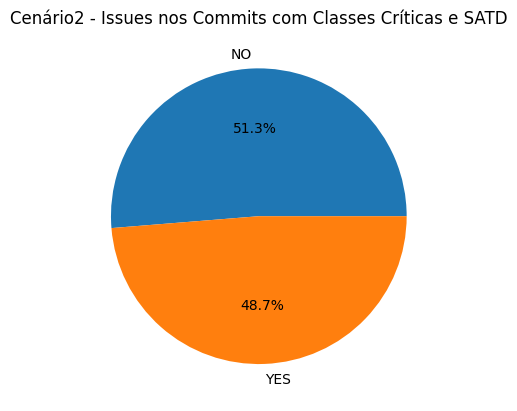

Total: 195 - Yes: 95, No: 100


In [88]:
show_pie(my_df=df_issues_cenario2, my_field='architectural_impact', my_title='Cenário2 - Issues nos Commits com Classes Críticas e SATD')

## Commits dos issues inspecionados

In [89]:
df_commits_cenario2

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files,architectural_impact,scenario
0,d2c2365a78e52424a88baf30448c1148d1ee787e,CASSANDRA-492,"add dcquorum/dcquorumsync consistency levels, ...","['StorageProxy.java', 'StorageService.java']",26/10/2009,761,12,"[\n {\n ""StorageProxy.java"": ""@@ -72...","[\n ""@@ -92,7 +92,9 @@ enum ConsistencyLeve...",YES,2
1,ccafdada1384428f42e3da3e9a507759ff170993,CASSANDRA-492,fixes for DQ quorum code. patch by Vijay Part...,['StorageProxy.java'],30/10/2009,44,4,"[\n {\n ""StorageProxy.java"": ""@@ -20...","[\n ""@@ -49,7 +49,6 @@ public class Datacen...",YES,2
2,242fa0231bd74fe09454e67c10a4af651dd8c4e2,CASSANDRA-522,CASSANDRA-522\nconvert replication strategy me...,"['ColumnFamilyStore.java', 'CompactionManager....",3/11/2009,114,9,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -289,7 +289,7 @@ public final class...",YES,2
3,3678daa0be6e88821b3a61e20c78493d6f119449,CASSANDRA-522,brute-force replacement of throwing maps aroun...,['StorageService.java'],3/11/2009,330,9,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -146,14 +146,13 @@ public class Boo...",YES,2
4,46e5f23e1bb6cf374d0d89ecff40c84a1824b998,CASSANDRA-522,fix NPE caused by getToken on endpoint that is...,['StorageService.java'],3/11/2009,28,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -110,7 +110,7 @@ public class BootS...",YES,2
...,...,...,...,...,...,...,...,...,...,...,...
247,26dd119679605bf61ad3caa24a70509e5be5aac9,CASSANDRA-17425,Add new CQL function maxWritetime\n\npatch by ...,['SelectStatement.java'],18/5/2022,350,18,"[\n {\n ""SelectStatement.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 4.2\n+ * Add new CQL...",NO,2
248,c635f198f6ceca272e61b857b67fd91f23da3836,CASSANDRA-17638,Fix leak of non-standard Java types in our Exc...,['DatabaseDescriptor.java'],19/5/2022,302,20,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -1,4 +1,6 @@\n 4.1\n+ * Fix leak of...",NO,2
249,1c70149ef512212d9cf8f57cb703fce92bf3dafa,CASSANDRA-17738,Fix Settings Virtual Table to update paxos_var...,"['Config.java', 'DatabaseDescriptor.java']",25/7/2022,28,9,"[\n {\n ""Config.java"": ""@@ -777,7 +7...","[\n ""@@ -1,4 +1,6 @@\n 4.1-alpha2\n+ * Fix ...",NO,2
250,873e024a32d37de08550c8106a8d7fd52bda588b,CASSANDRA-17711,CASSANDRA-17711: Add nodetool forcecompact,"['ColumnFamilyStore.java', 'CompactionManager....",7/11/2022,465,11,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 4.2\n+ * Add nodetoo...",NO,2


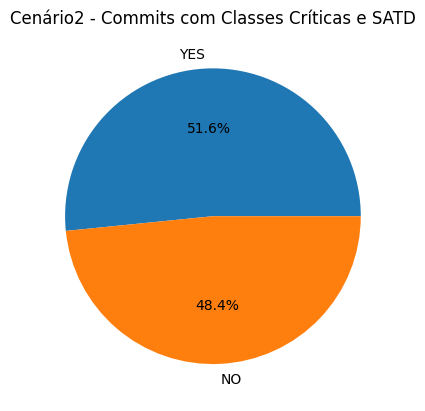

Total: 252 - Yes: 122, No: 130


In [90]:
show_pie(my_df=df_commits_cenario2, my_field='architectural_impact', my_title='Cenário2 - Commits com Classes Críticas e SATD')

### Commits com Architectural Impact

Commits com classes críticas e SATD (msg e/ou diffs) e issues registrados

In [91]:
df_commits_com_architectural_impacdt_c2 = df_commits_cenario2[df_commits_cenario2['architectural_impact']=='YES']
df_commits_com_architectural_impacdt_c2

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files,architectural_impact,scenario
0,d2c2365a78e52424a88baf30448c1148d1ee787e,CASSANDRA-492,"add dcquorum/dcquorumsync consistency levels, ...","['StorageProxy.java', 'StorageService.java']",26/10/2009,761,12,"[\n {\n ""StorageProxy.java"": ""@@ -72...","[\n ""@@ -92,7 +92,9 @@ enum ConsistencyLeve...",YES,2
1,ccafdada1384428f42e3da3e9a507759ff170993,CASSANDRA-492,fixes for DQ quorum code. patch by Vijay Part...,['StorageProxy.java'],30/10/2009,44,4,"[\n {\n ""StorageProxy.java"": ""@@ -20...","[\n ""@@ -49,7 +49,6 @@ public class Datacen...",YES,2
2,242fa0231bd74fe09454e67c10a4af651dd8c4e2,CASSANDRA-522,CASSANDRA-522\nconvert replication strategy me...,"['ColumnFamilyStore.java', 'CompactionManager....",3/11/2009,114,9,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -289,7 +289,7 @@ public final class...",YES,2
3,3678daa0be6e88821b3a61e20c78493d6f119449,CASSANDRA-522,brute-force replacement of throwing maps aroun...,['StorageService.java'],3/11/2009,330,9,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -146,14 +146,13 @@ public class Boo...",YES,2
4,46e5f23e1bb6cf374d0d89ecff40c84a1824b998,CASSANDRA-522,fix NPE caused by getToken on endpoint that is...,['StorageService.java'],3/11/2009,28,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -110,7 +110,7 @@ public class BootS...",YES,2
...,...,...,...,...,...,...,...,...,...,...,...
125,6a1d9de3d938d24baa2ba98b5379b0536177c786,CASSANDRA-16926,[CASSANDRA-16926] CEP-10 Phase 1: Mockable Fil...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",7/10/2021,6710,458,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -44,10 +44,10 @@\n </module>\n ...",YES,2
126,77dde2a3c4b40da3d820d4852c572338acbf6dc9,CASSANDRA-17065,Introduce separate rate limiting settings for ...,"['Config.java', 'DatabaseDescriptor.java', 'St...",10/11/2021,862,29,"[\n {\n ""Config.java"": ""@@ -244,6 +2...","[\n ""@@ -1,4 +1,5 @@\n 4.1\n+ * Introduce s...",YES,2
127,3409e5d9b341de2114d6410225922843539d4172,CASSANDRA-17166,Enhance SnakeYAML properties to be reusable ou...,['Config.java'],22/4/2022,3325,33,"[\n {\n ""Config.java"": ""@@ -73,19 +7...","[\n ""@@ -69,6 +69,9 @@\n <...",YES,2
128,b2660bcf78ccf08a3a0ae39a8c9ffb397efef9ff,CASSANDRA-17921,Fix JMX security vulnerabilities\n\n patch by ...,['CassandraDaemon.java'],18/10/2022,205,5,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 3.0.28\n+ * Harden J...",YES,2


In [92]:
round(df_commits_com_architectural_impacdt_c2.describe(), 2)

,lines,files,scenario
count,130.00,130.00,130.0
mean,919.58,21.99,2.0
std,1698.99,48.61,0.0
min,2.00,1.00,2.0
25%,99.50,4.00,2.0
50%,263.00,9.00,2.0
75%,988.00,23.75,2.0
max,13576.00,458.00,2.0


### Commits sem Architectural Issues

In [93]:
df_commits_sem_architectural_impacdt_c2 = df_commits_cenario2[df_commits_cenario2['architectural_impact']=='NO']
df_commits_sem_architectural_impacdt_c2

,hahs,lista_issues,msg,m_files,date,lines,files,diff_files,diff_modified_files,architectural_impact,scenario
130,91afe8b6e9e9f0a808261b72c8532841b871ba45,CASSANDRA-65,move *Partitioner from cassandra.service to ca...,['StorageService.java'],27/4/2009,31,6,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -44,7 +44,7 @@ import org.apache.ca...",NO,2
131,63a748ccf9ab5192456baca9dd90b4c0cf2a2038,CASSANDRA-65,r/m unused code\npatch by jbellis; reviewed by...,['StorageService.java'],27/4/2009,72,2,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -71,40 +71,7 @@ public class RackUn...",NO,2
132,907d92e21b8ce79e6a224933764e3b7215a94454,CASSANDRA-65,replace BigInteger tokens with BigIntegerToken...,"['ColumnFamilyStore.java', 'StorageService.java']",27/4/2009,1090,31,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -43,6 +43,7 @@ import org.apache.lo...",NO,2
133,ec7f04b4df62b87231d9cacca754a209bd8fcc59,CASSANDRA-65,r/m StorageService.token in favor of explicitl...,"['ColumnFamilyStore.java', 'StorageService.java']",27/4/2009,101,8,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1113,7 +1113,7 @@ public class Col...",NO,2
134,296e15b63cdb678a12db004e29359eaf8c14c6c5,CASSANDRA-65,add test for ReplicaPlacementStrategy covering...,['StorageService.java'],27/4/2009,77,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -2,7 +2,7 @@ package org.apache.cas...",NO,2
...,...,...,...,...,...,...,...,...,...,...,...
247,26dd119679605bf61ad3caa24a70509e5be5aac9,CASSANDRA-17425,Add new CQL function maxWritetime\n\npatch by ...,['SelectStatement.java'],18/5/2022,350,18,"[\n {\n ""SelectStatement.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 4.2\n+ * Add new CQL...",NO,2
248,c635f198f6ceca272e61b857b67fd91f23da3836,CASSANDRA-17638,Fix leak of non-standard Java types in our Exc...,['DatabaseDescriptor.java'],19/5/2022,302,20,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -1,4 +1,6 @@\n 4.1\n+ * Fix leak of...",NO,2
249,1c70149ef512212d9cf8f57cb703fce92bf3dafa,CASSANDRA-17738,Fix Settings Virtual Table to update paxos_var...,"['Config.java', 'DatabaseDescriptor.java']",25/7/2022,28,9,"[\n {\n ""Config.java"": ""@@ -777,7 +7...","[\n ""@@ -1,4 +1,6 @@\n 4.1-alpha2\n+ * Fix ...",NO,2
250,873e024a32d37de08550c8106a8d7fd52bda588b,CASSANDRA-17711,CASSANDRA-17711: Add nodetool forcecompact,"['ColumnFamilyStore.java', 'CompactionManager....",7/11/2022,465,11,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 4.2\n+ * Add nodetoo...",NO,2


In [94]:
round(df_commits_sem_architectural_impacdt_c2.describe(), 2)

,lines,files,scenario
count,122.00,122.00,122.0
mean,605.55,16.28,2.0
std,1481.42,42.19,0.0
min,3.00,1.00,2.0
25%,31.00,3.00,2.0
50%,117.00,5.00,2.0
75%,454.00,13.75,2.0
max,9669.00,418.00,2.0
